<>:190: SyntaxWarning: invalid escape sequence '\h'
<>:190: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Joshua\AppData\Local\Temp\ipykernel_19004\3405830932.py:190: SyntaxWarning: invalid escape sequence '\h'
  '''


K = 1 B = 0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
K = 1 B = 0.01
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
K = 1 B = 0.02
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
K = 1 B = 0.05
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
K = 1 B = 0.1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
K = 1 B = 0.15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
K = 1 B = 0.2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
2

'\n        fig, ax = plt.subplots()\n        for p in range(length):\n            ax.scatter( np.linspace(0,1,num_points), recordlong[:, p, -1], marker=\'o\', label="Param Row =" + str(p))\n\n        ax.set_xlabel(r\'Probability of Selecting the Control Map\')\n        ax.set_ylabel(r\'AntiFerromagnetic Order Parameter\')\n        ax.set_title(r\'Interchain AFM Parameter with Bitstring length \'+str(length))\n        fig.savefig(path+\'Interchain AFM Param Length = \' + str(length) +\'.png\')\n\n        #fig.save("200 Length BitString, Full Probability Spectrum")\n        #plt.show()\n        #fig, ax = plt.subplots()\n        #ax.plot( np.linspace(.3,.6,30), record1[30:60], marker=\'o\')\n        #ax.set_xlabel(r\'Probability of Selecting the Control Map\')\n        #ax.set_ylabel(r\'$ <\\hat{O}>$\')\n        #ax.set_title(r\'Results of a Simulation with Bitstring length \'+str(length))\n        #fig.save("200 Length BitString, Full Probability Spectrum")\n        #plt.show()\n       

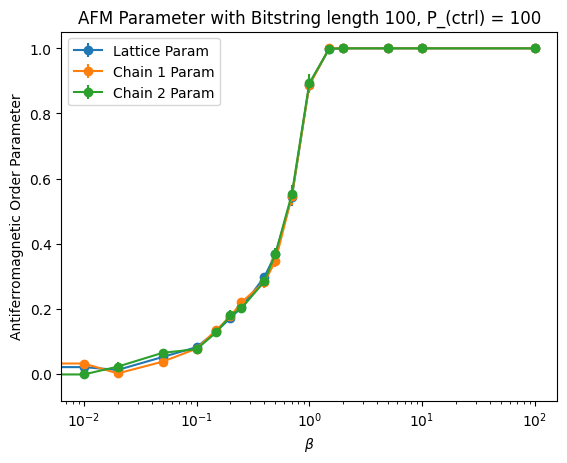

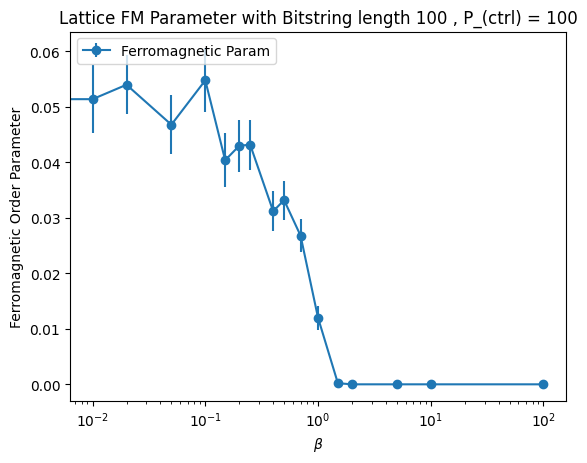

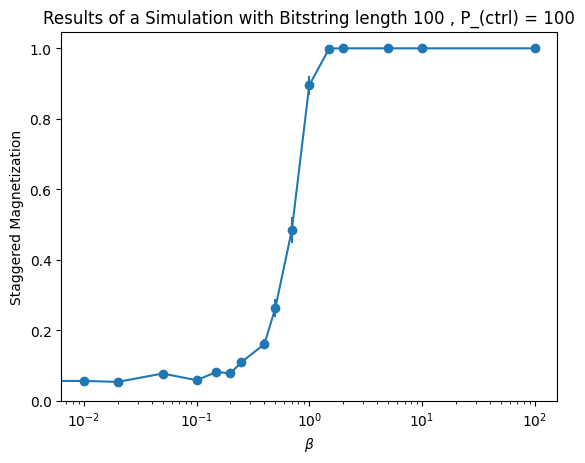

In [128]:
import numpy as np
import random
from fractions import Fraction
from Commands import dec2int, bernoulli, control, order_parameter
from MonteCarloCommands import energy, boltzmann_probability
import matplotlib.pyplot as plt
import os

betarange = [0, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.4, 0.5, 0.7, 1, 1.5, 2, 5, 10, 100]
betalength = len(betarange)

for K in [1]:
    b=0
    length = 100
    random.seed(10)
    times = 50
    low_prob = 00
    high_prob = 100 + 1
    #Beta = 1.5
    #K = 1 
    num_chains = 2
    spacing = 50
    prob_range = [0, 5, 10, 50, 75, 90, 95, 100] #range(low_prob, high_prob, spacing)
    num_points = len(prob_range) #int(np.ceil((high_prob-low_prob)/spacing))

    if (length**2//2) % 10 == 0:
    #record = np.zeros([high_prob-low_prob, 1], dtype=float)
        time_size = (length**2)//200+1 # number of data points along the time axis

        record1 = np.zeros([times, num_points, time_size, betalength], dtype=float) #[probability, time]
        record2 = np.zeros([times, num_points, time_size, betalength], dtype=float)
        recordferro = np.zeros([times, num_points,time_size, betalength], dtype=float) # set up for ferromagnetic order parameter
        #record3 = np.zeros([high_prob-low_prob, 1], dtype=float)
        recordlong = np.zeros((times, num_points, time_size, betalength), dtype=float) #[probability, position, time]
        staggeredMagnetization = np.zeros((times, num_points,time_size, betalength), dtype=float)
        totalparam = np.zeros((times, num_points,time_size, betalength))
        totrecordlong = np.zeros((times, num_points, time_size, betalength))
        
    else: 
        time_size = (length**2)//200+2 # number of data points along the time axis

        record1 = np.zeros([times,num_points, time_size, betalength], dtype=float) #[probability, time]
        record2 = np.zeros([times,num_points, time_size, betalength], dtype=float)
        recordferro = np.zeros([times, num_points,time_size, betalength], dtype=float) # set up for ferromagnetic order parameter
        #record3 = np.zeros([high_prob-low_prob, 1], dtype=float)
        recordlong = np.zeros((times,num_points, time_size, betalength), dtype=float)
        staggeredMagnetization = np.zeros((times, num_points,time_size, betalength), dtype=float)
        totalparam = np.zeros((times,num_points,time_size, betalength))
        totrecordlong = np.zeros((times,num_points, time_size, betalength))
    acceptance = np.zeros([times,num_points,betalength])
    for Beta in betarange:
        
        
        
        NeelState1 = dec2int(Fraction(1,3),length)
        NeelState2 = dec2int(Fraction(2,3),length)
        print('K = ' + str(K), 'B = ' + str(Beta))
        if K == 1:
            path = 'D:/Lab Research Results/Simulation Results/AntiFerromagnet/betarange/test/'
        else:
            path = 'D:/Lab Research Results/Simulation Results/Ferromagnet/betarange/test/'
        os.makedirs(path, exist_ok=True)

        
        dict = {}
        for k in range(0, times):
            j = 0
            print(k)
            # Probability of choosing the Control Map
            for prob in [0, 5, 10, 50, 75, 90, 95, 100]:
                #print(prob)
                #number1 = random.random()
                #number2 = random.random()
                #number3 = random.random()
                #number = tests[k]
                rep1 = random.getrandbits(length)
                rep2 = random.getrandbits(length)
                dict
                lattice = [rep1, rep2]
                #rep3 = dec2int(number3, length)
                #print(k, rep, dec2int(Fraction(2, 3), length), dec2int(Fraction(1, 3), length))
                for i in range((length**2)//2):
                    
                    if (i%100)==0 and i != (length**2)//2:
                        record1[k,j, i//100,b] = order_parameter(rep1, length)
                        record2[k,j, i//100,b] = order_parameter(rep2, length)
                        recordferro[k, j, i//100,b] = np.abs((length-bin(lattice[0]).count('1')-bin(lattice[1]).count('1'))/(length))
                        #record3[j] += order_parameter(rep3, length)/times
                        #for y in range(length):
                        #    for x in range(num_chains):
                        #        staggeredMagnetization[k, j, i//100] += (-1)**(x+y+((lattice[x]&(1<<y))>>y))/(2*length)
                        staggeredMagnetization[k,j,i//100,b]=((bin(rep1^NeelState1).count('1')+bin(rep2^NeelState2).count('1'))-length)/length
                        recordlong[k,j, i//100,b] = (2*bin(rep1^rep2).count('1')-length)/length
                    if random.random() > (float(prob) / 100):
                        rep1 = bernoulli(rep1, length)
                    else:
                        rep1 = control(rep1, length)
                    if random.random() > (float(prob)/100):
                        rep2 = bernoulli(rep2, length)
                    else:
                        rep2 = control(rep2, length)
                    #if random.random() > (float(prob)/100):
                    #    rep3 = bernoulli(rep3, length)
                    #else:
                    #    rep3 = control(rep3, length)
                    

                    # Initializing Ising Array for Monte Carlo Simulation
                    lattice = [rep1, rep2]
                            #format(rep3, '0'+str(length)+'b')]
                    for repeat in range(1):
                        for y_pos in range(0, length): # this section takes about 1/100 s at length = 100, accounts for most of the run time
                            for x_pos in range(0, num_chains):
                                E_i = energy(x_pos, y_pos, lattice, num_chains, length, K, True)
                                old = lattice[x_pos]
                                # noinspection PyTypeChecker
                                lattice[x_pos] = lattice[x_pos]^(0b1<<y_pos)
                                E_f = energy(x_pos, y_pos, lattice, num_chains, length, K, True)
                                rand = random.random()
                                if rand <= min(1/2,boltzmann_probability(E_i, E_f, Beta)):
                                    acceptance[k,j,b] += 1
                                else:
                                    lattice[x_pos] = old
                    

                    
                    rep1 = lattice[0]
                    rep2 = lattice[1]
                    #rep3 = int(lattice[2], base=2)
                #record[j] += (order_parameter(rep1, length)+order_parameter(rep2,length)+order_parameter(rep3, length))/(3*times) # can get rid of. just average the other three records in a plot
                record1[k,j, -1,b] = order_parameter(rep1, length)
                record2[k,j, -1,b] = order_parameter(rep2, length)
                recordferro[k, j, -1,b] = (length-bin(lattice[0]).count('1')-bin(lattice[1]).count('1'))/(length)
                recordferro = np.abs(recordferro)
                #record3[j] += order_parameter(rep3, length)/times
                #for y in range(length):
                #    for x in range(num_chains):
                #        staggeredMagnetization[k, j, -1] += (-1)**(x+y+((lattice[x]&(1<<y))>>y))/(2*length)
                staggeredMagnetization[k, j, -1,b] =((bin(rep1^NeelState1).count('1')+bin(rep2^NeelState2).count('1'))-length)/length
                staggeredMagnetization = np.abs(staggeredMagnetization) # accounts for changes of sign between iterations
                recordlong[k,j, -1,b] = (2*bin(rep1^rep2).count('1')-length)/length

                #totrecordlong = (np.sum(recordlong, axis=1)/(length))
                j += 1
        b+=1
                #print(j, number, rep, record[j])
for i in range(num_points):
    for tau in range(time_size):
        totalparam[:,i, tau,:] = record1[:,i, tau,:]/3+record2[:,i, tau,:]/3 + recordlong[:,i,tau,:]/3 
plt.rcParams.update({
    "text.usetex": False,
})
        #print(record[99])

fig, ax = plt.subplots() # results at end of simulation
ax.errorbar( betarange, np.average(totalparam, axis=0)[-1,-1,:], yerr=np.std(totalparam, axis=0, ddof=1)[-1,-1,:]/np.sqrt(times), marker='o', label="Lattice Param")

ax.errorbar( betarange, np.average(record1,axis=0)[-1,-1,:],yerr= np.std(record1,axis=0, ddof=1)[-1,-1,:]/np.sqrt(times), marker='o', label= "Chain 1 Param")
ax.errorbar(betarange, np.average(record2, axis=0)[-1,-1,:],yerr= np.std(record2, axis=0, ddof=1)[-1,-1,:]/np.sqrt(times), marker='o', label= "Chain 2 Param")

#Below creates two lines crossing at (.5,.5)
#plt.axvline(.5)
#plt.axhline(.5)

plt.legend(loc='upper left')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'Antiferromagnetic Order Parameter')
ax.set_title(r'AFM Parameter with Bitstring length ' + str(length)+', P_(ctrl) = '+str(prob))
plt.xscale('log')
fig.savefig(path+'AFM Param Length = ' + str(length) +'beta range, P_ctrl = ' + str(prob)+ '.png')

fig, ax = plt.subplots() # results at end of simulation
ax.errorbar(betarange, np.average(recordferro, axis=0)[-1,-1,:], yerr= np.std(recordferro, axis=0, ddof=1)[-1,-1,:]/np.sqrt(times), marker='o', label= "Ferromagnetic Param")
plt.legend(loc='upper left')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'Ferromagnetic Order Parameter')
ax.set_title(r'Lattice FM Parameter with Bitstring length '+str(length) +' , P_(ctrl) = '+str(prob))
plt.xscale('log')
fig.savefig(path+'FM Param Length = ' + str(length) +'beta range, P_ctrl = ' + str(prob)+ '.png')

fig, ax = plt.subplots() # results at end of simulation
ax.errorbar(betarange, np.average(staggeredMagnetization, axis = 0)[-1,-1,:],yerr=np.std(staggeredMagnetization, axis=0, ddof=1)[-1,-1,:]/np.sqrt(times), marker='o', label = "Staggered Magnetization")
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'Staggered Magnetization')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) +' , P_(ctrl) = '+str(prob))
plt.xscale('log')
fig.savefig(path+'Staggered Magnetization Length = ' + str(length) +'beta range, P_ctrl = ' + str(prob)+ '.png')


'''
        fig, ax = plt.subplots()
        for p in range(length):
            ax.scatter( np.linspace(0,1,num_points), recordlong[:, p, -1], marker='o', label="Param Row =" + str(p))

        ax.set_xlabel(r'Probability of Selecting the Control Map')
        ax.set_ylabel(r'AntiFerromagnetic Order Parameter')
        ax.set_title(r'Interchain AFM Parameter with Bitstring length '+str(length))
        fig.savefig(path+'Interchain AFM Param Length = ' + str(length) +'.png')

        #fig.save("200 Length BitString, Full Probability Spectrum")
        #plt.show()
        #fig, ax = plt.subplots()
        #ax.plot( np.linspace(.3,.6,30), record1[30:60], marker='o')
        #ax.set_xlabel(r'Probability of Selecting the Control Map')
        #ax.set_ylabel(r'$ <\hat{O}>$')
        #ax.set_title(r'Results of a Simulation with Bitstring length '+str(length))
        #fig.save("200 Length BitString, Full Probability Spectrum")
        #plt.show()
        #print(lattice)
        #print(int(lattice[0], base = 2)-int(lattice[1], base = 2))
        #print(record1[-1,-1],  record2[-1,-1])

        fig,ax = plt.subplots()
        rec1=ax.imshow(record1, cmap='hot', interpolation='nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob], vmin=np.min(record1), vmax=np.max(record1), aspect='auto')
        fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
        ax.set_xlabel(r'Simulation Time')
        ax.set_ylabel(r'Probability')
        ax.set_title(r'Antiferromagnetic Order Parameter for Chain 1 $\beta$=' + str(Beta))
        fig.savefig(path+'AFM Param Heatmap Chain 1 Length = ' + str(length) +'.png')

        fig,ax = plt.subplots()
        rec1=ax.imshow(record2, cmap='hot', interpolation='nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob],vmin=np.min(record2), vmax=np.max(record2), aspect='auto')
        fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
        ax.set_xlabel(r'Simulation Time')
        ax.set_ylabel(r'Probability')
        ax.set_title(r'Antiferromagnetic Order Parameter for Chain 2 $\beta$=' + str(Beta))
        fig.savefig(path+'AFM Param Heatmap Chain 2 Length = ' + str(length) +'.png')


        fig,ax = plt.subplots()
        rec1=ax.imshow(np.average(recordferro, axis=0), cmap='hot', interpolation='nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob],vmin=np.min(np.average(recordferro, axis=0)), vmax=np.max(np.average(recordferro, axis=0)), aspect='auto')
        fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
        ax.set_xlabel(r'Simulation Time')
        ax.set_ylabel(r'Probability')
        ax.set_title(r'Ferromagnetic Order Parameter for the Lattice $\beta$=' + str(Beta))
        fig.savefig(path+'FM Param Heatmap Length = ' + str(length) +'.png')


        fig,ax = plt.subplots()
        rec1=ax.imshow( np.average(staggeredMagnetization, axis=0), cmap='hot', interpolation='nearest', origin='lower',extent=[0,(length**2)//2,low_prob,high_prob], vmin=np.min(np.average(staggeredMagnetization, axis=0)), vmax=np.max(np.average(staggeredMagnetization, axis=0)), aspect='auto')
        fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
        ax.set_xlabel(r'Simulation Time')
        ax.set_ylabel(r'Probability')
        ax.set_title(r'Staggered Magnetization for the Lattice $\beta$=' + str(Beta))
        fig.savefig(path+'Staggered Magnetization Heatmap Length = ' + str(length) +'.png')


        fig,ax = plt.subplots()
        rec1=ax.imshow(totalparam,cmap = 'hot',interpolation='nearest', origin='lower', extent=[0,(length**2)//2,low_prob,high_prob],vmin=np.min(totalparam), vmax=np.max(totalparam), aspect='auto')
        fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
        ax.set_xlabel(r'Simulation Time')
        ax.set_ylabel(r'Probability')
        ax.set_title(r'Antiferromagnetic Order Parameter for the Lattice $\beta$=' + str(Beta))
        fig.savefig(path+'AFM Param Heatmap Lattice Length = ' + str(length) +'.png')
'''


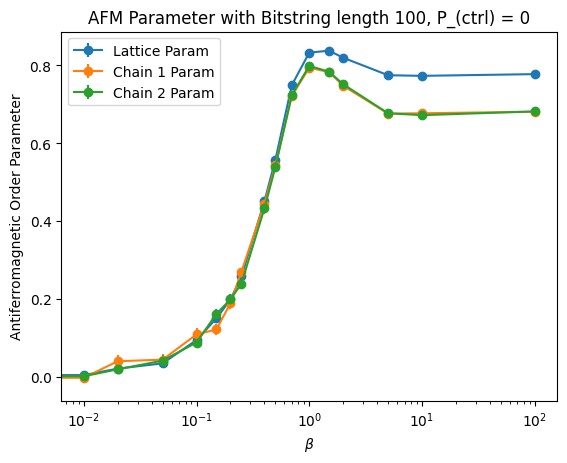

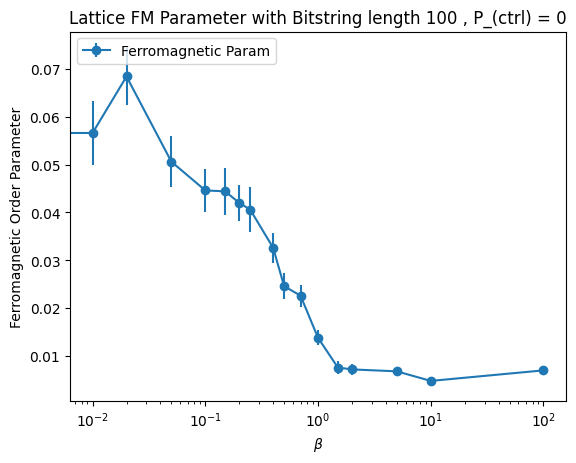

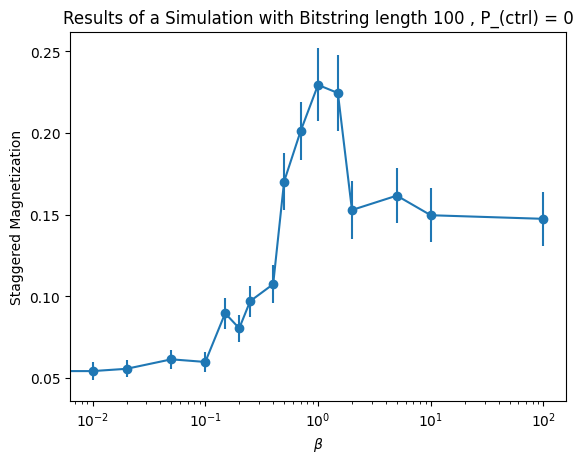

In [129]:
plt.rcParams.update({
    "text.usetex": False,
})
        #print(record[99])

fig, ax = plt.subplots() # results at end of simulation
ax.errorbar( betarange, np.average(totalparam, axis=0)[0,-1,:], yerr=np.std(totalparam, axis=0, ddof=1)[0,-1,:]/np.sqrt(times), marker='o', label="Lattice Param")

ax.errorbar( betarange, np.average(record1,axis=0)[0,-1,:],yerr= np.std(record1,axis=0, ddof=1)[0,-1,:]/np.sqrt(times), marker='o', label= "Chain 1 Param")
ax.errorbar(betarange, np.average(record2, axis=0)[0,-1,:],yerr= np.std(record2, axis=0, ddof=1)[0,-1,:]/np.sqrt(times), marker='o', label= "Chain 2 Param")

#Below creates two lines crossing at (.5,.5)
#plt.axvline(.5)
#plt.axhline(.5)

plt.legend(loc='upper left')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'Antiferromagnetic Order Parameter')
ax.set_title(r'AFM Parameter with Bitstring length ' + str(length)+', P_(ctrl) = '+str(0))
fig.savefig(path+'AFM Param Length = ' + str(length) +'beta range, P_ctrl = ' + str(0)+ '.png')
plt.xscale('log')

fig, ax = plt.subplots() # results at end of simulation
ax.errorbar(betarange, np.average(recordferro, axis=0)[0,-1,:], yerr= np.std(recordferro, axis=0, ddof=1)[0,-1,:]/np.sqrt(times), marker='o', label= "Ferromagnetic Param")
plt.legend(loc='upper left')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'Ferromagnetic Order Parameter')
ax.set_title(r'Lattice FM Parameter with Bitstring length '+str(length) +' , P_(ctrl) = '+str(0))
fig.savefig(path+'FM Param Length = ' + str(length) +'beta range, P_ctrl = ' + str(0)+ '.png')
plt.xscale('log')

fig, ax = plt.subplots() # results at end of simulation
ax.errorbar(betarange, np.average(staggeredMagnetization, axis = 0)[0,-1,:],yerr=np.std(staggeredMagnetization, axis=0, ddof=1)[0,-1,:]/np.sqrt(times), marker='o', label = "Staggered Magnetization")
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'Staggered Magnetization')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) +' , P_(ctrl) = '+str(0))
fig.savefig(path+'Staggered Magnetization Length = ' + str(length) +'beta range, P_ctrl = ' + str(0)+ '.png')
plt.xscale('log')

Text(0.5, 1.0, 'Results of a Simulation with Bitstring length 100')

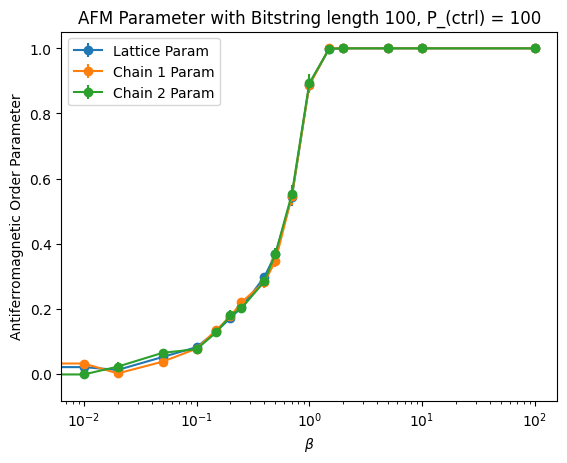

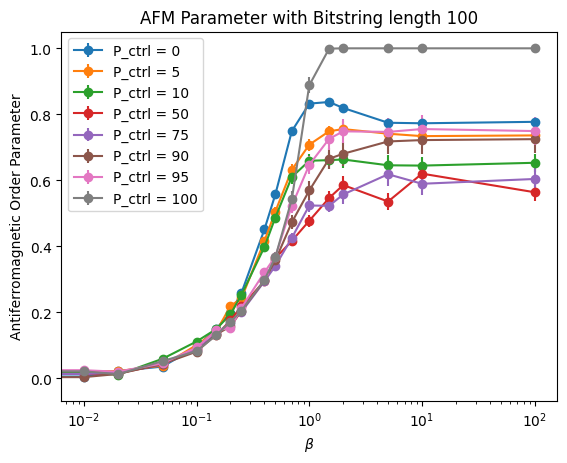

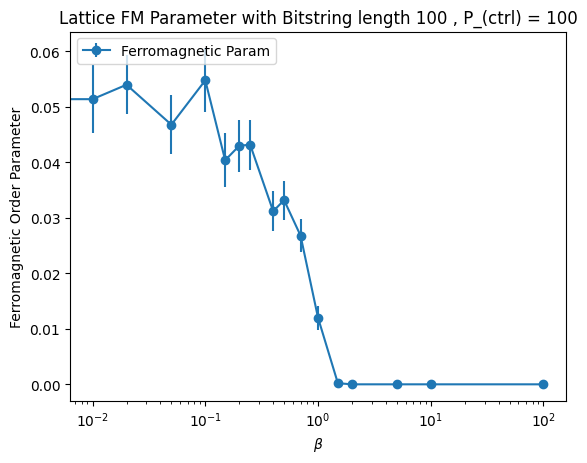

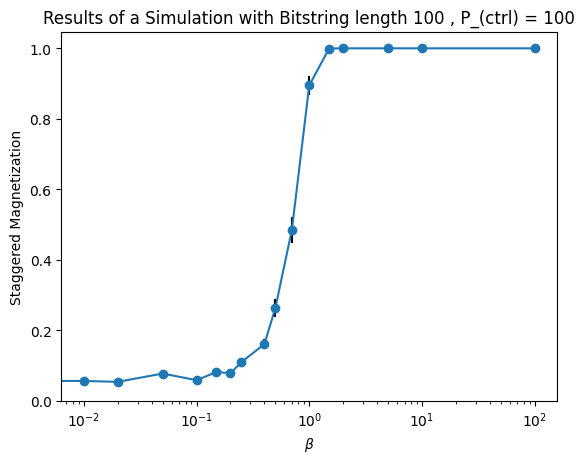

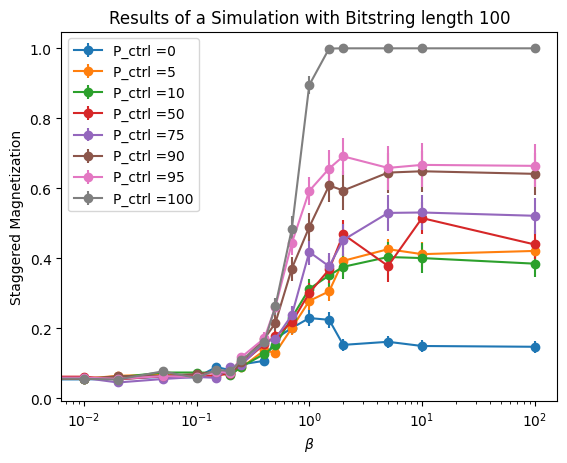

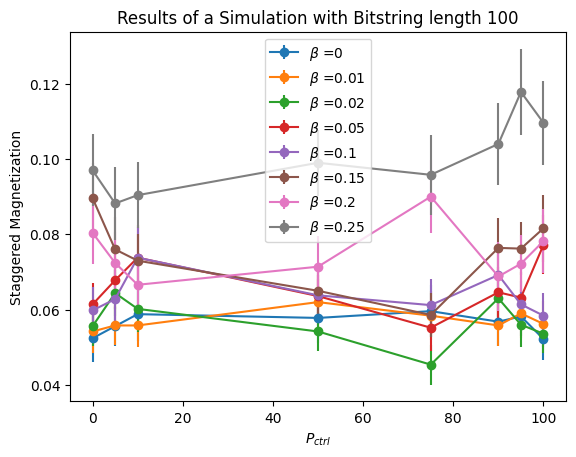

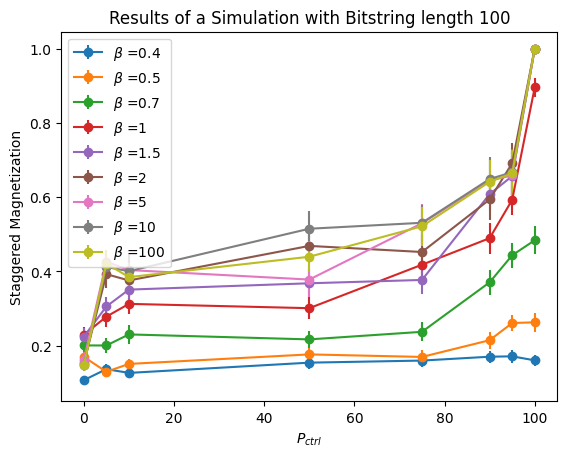

In [137]:
plt.rcParams.update({
    "text.usetex": False,
})
        #print(record[99])

fig, ax = plt.subplots() # results at end of simulation
ax.errorbar( betarange, np.average(totalparam, axis=0)[-1,-1,:], yerr=np.std(totalparam, axis=0, ddof=1)[-1,-1,:]/np.sqrt(times), marker='o', label="Lattice Param")

ax.errorbar( betarange, np.average(record1,axis=0)[-1,-1,:],yerr= np.std(record1,axis=0, ddof=1)[-1,-1,:]/np.sqrt(times), marker='o', label= "Chain 1 Param")
ax.errorbar(betarange, np.average(record2, axis=0)[-1,-1,:],yerr= np.std(record2, axis=0, ddof=1)[-1,-1,:]/np.sqrt(times), marker='o', label= "Chain 2 Param")

#Below creates two lines crossing at (.5,.5)
#plt.axvline(.5)
#plt.axhline(.5)

plt.legend(loc='upper left')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'Antiferromagnetic Order Parameter')
ax.set_title(r'AFM Parameter with Bitstring length ' + str(length)+', P_(ctrl) = '+str(prob))
plt.xscale('log')
fig.savefig(path+'AFM Param Length = ' + str(length) +'beta range, P_ctrl = ' + str(prob)+ '.png')

fig, ax = plt.subplots()
for i in range(num_points):
    ax.errorbar( betarange, np.average(totalparam, axis=0)[i,-1,:], yerr=np.std(totalparam, axis=0, ddof=1)[i,-1,:]/np.sqrt(times), marker='o', label="P_ctrl = " + str(prob_range[i]))
plt.xscale('log')
ax.set_ylabel(r'Antiferromagnetic Order Parameter')
ax.set_xlabel(r'$\beta$')
ax.set_title(r'AFM Parameter with Bitstring length ' + str(length))
plt.legend()

fig, ax = plt.subplots() # results at end of simulation
ax.errorbar(betarange, np.average(recordferro, axis=0)[-1,-1,:], yerr= np.std(recordferro, axis=0, ddof=1)[-1,-1,:]/np.sqrt(times), marker='o', label= "Ferromagnetic Param")
plt.legend(loc='upper left')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'Ferromagnetic Order Parameter')
ax.set_title(r'Lattice FM Parameter with Bitstring length '+str(length) +' , P_(ctrl) = '+str(prob))
plt.xscale('log')
fig.savefig(path+'FM Param Length = ' + str(length) +'beta range, P_ctrl = ' + str(prob)+ '.png')

fig, ax = plt.subplots() # results at end of simulation
ax.errorbar(betarange, np.average(staggeredMagnetization, axis = 0)[-1,-1,:],yerr=np.std(staggeredMagnetization, axis=0, ddof=1)[-1,-1,:]/np.sqrt(times), marker='o', label = "Staggered Magnetization", ecolor='0')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'Staggered Magnetization')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) +' , P_(ctrl) = '+str(prob))
plt.xscale('log')
fig.savefig(path+'Staggered Magnetization Length = ' + str(length) +'beta range, P_ctrl = ' + str(prob)+ '.png')
fig, ax = plt.subplots() # results at end of simulation
for i in range(num_points):
    ax.errorbar(betarange, np.average(staggeredMagnetization, axis = 0)[i,-1,:],yerr=np.std(staggeredMagnetization, axis=0, ddof=1)[i,-1,:]/np.sqrt(times), marker='o', label = "P_ctrl =" + str(prob_range[i]))
ax.legend()
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'Staggered Magnetization')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) )
plt.xscale('log')
fig, ax = plt.subplots() # results at end of simulation
for i in range(betalength//2):
    ax.errorbar(prob_range, np.average(staggeredMagnetization, axis = 0)[:,-1,i],yerr=np.std(staggeredMagnetization, axis=0, ddof=1)[:,-1,i]/np.sqrt(times), marker='o', label = r"$\beta$ =" + str(betarange[i]))
ax.legend()
ax.set_xlabel(r'$P_{ctrl}$')
ax.set_ylabel(r'Staggered Magnetization')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) )

fig, ax = plt.subplots() # results at end of simulation
for i in range(betalength//2, betalength):
    ax.errorbar(prob_range, np.average(staggeredMagnetization, axis = 0)[:,-1,i],yerr=np.std(staggeredMagnetization, axis=0, ddof=1)[:,-1,i]/np.sqrt(times), marker='o', label = r"$\beta$ =" + str(betarange[i]))
ax.legend()
ax.set_xlabel(r'$P_{ctrl}$')
ax.set_ylabel(r'Staggered Magnetization')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) )


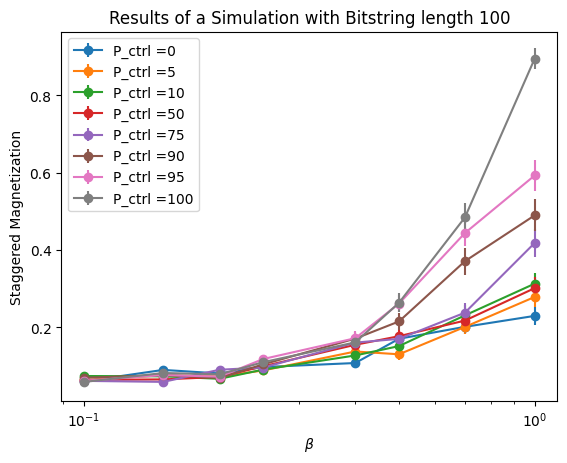

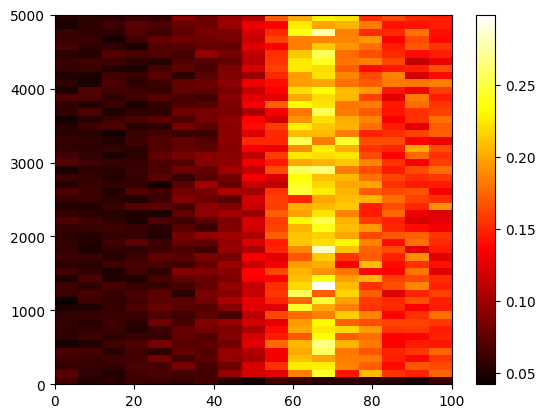

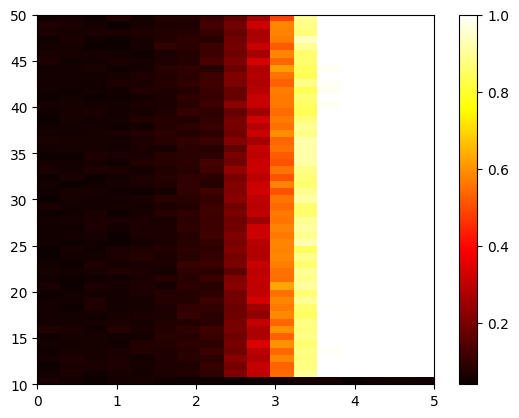

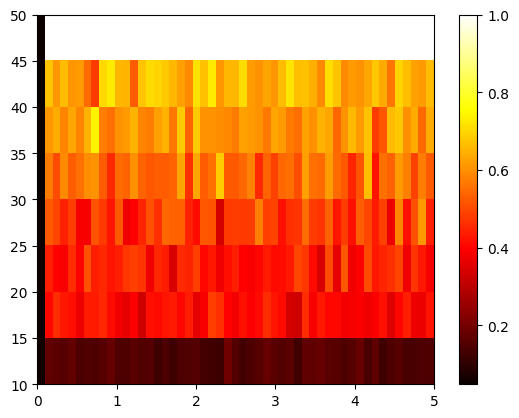

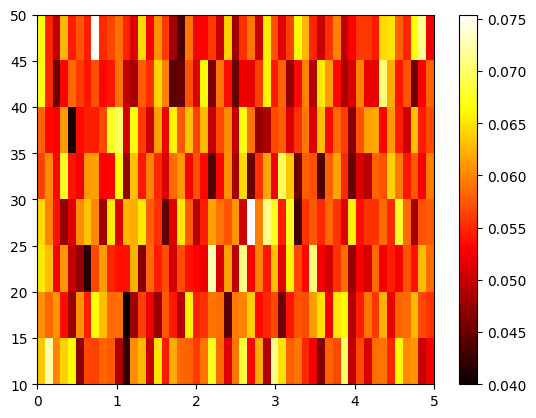

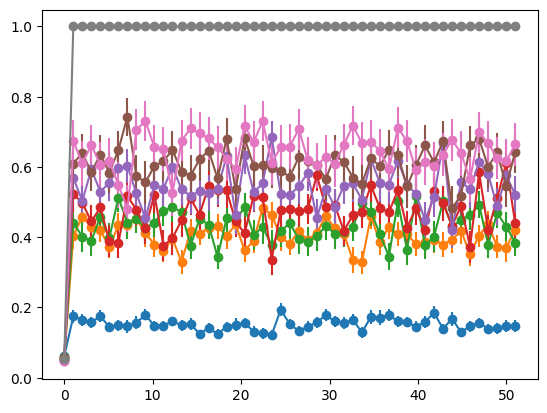

In [140]:
fig, ax = plt.subplots()
for i in range(num_points):
    ax.errorbar(betarange[4:12], np.average(staggeredMagnetization, axis = 0)[i,-1,4:12],yerr=np.std(staggeredMagnetization, axis=0, ddof=1)[i,-1,4:12]/np.sqrt(times), marker='o', label = "P_ctrl =" + str(prob_range[i]))
ax.legend()
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'Staggered Magnetization')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length))
plt.xscale('log')
fig,ax = plt.subplots()
sm = plt.imshow(np.average(staggeredMagnetization, axis = 0)[0,:,:],cmap = 'hot',interpolation='nearest', origin='lower', extent = [0, betarange[-1], 0, (length**2)//2],vmin=np.min(np.average(staggeredMagnetization, axis = 0)[0,:,:]), vmax=np.max(np.average(staggeredMagnetization, axis = 0)[0,:,:]), aspect='auto')
fig.colorbar(sm, ax=ax, location ='right', shrink = 1)

fig,ax = plt.subplots()
sm =plt.imshow(np.average(staggeredMagnetization, axis = 0)[-1,:,:],cmap = 'hot',interpolation='nearest', origin='lower', extent=prob_range,vmin=np.min(np.average(staggeredMagnetization, axis = 0)[-1,:,:]), vmax=np.max(np.average(staggeredMagnetization, axis = 0)[-1,:,:]), aspect='auto')
fig.colorbar(sm, ax=ax, location ='right', shrink = 1)

fig,ax = plt.subplots()
sm =plt.imshow(np.average(staggeredMagnetization, axis = 0)[:,:,-1],cmap = 'hot',interpolation='nearest', origin='lower', extent=prob_range,vmin=np.min(np.average(staggeredMagnetization, axis = 0)[:,:,-1]), vmax=np.max(np.average(staggeredMagnetization, axis = 0)[:,:,-1]), aspect='auto')
fig.colorbar(sm, ax=ax, location ='right', shrink = 1)

fig,ax = plt.subplots()
sm =plt.imshow(np.average(staggeredMagnetization, axis = 0)[:,:,0],cmap = 'hot',interpolation='nearest', origin='lower', extent=prob_range,vmin=np.min(np.average(staggeredMagnetization, axis = 0)[:,:,0]), vmax=np.max(np.average(staggeredMagnetization, axis = 0)[:,:,0]), aspect='auto')
fig.colorbar(sm, ax=ax, location ='right', shrink = 1)

fig,ax = plt.subplots()
for i in range(num_points):
    ax.errorbar(np.linspace(0,time_size, time_size), np.average(staggeredMagnetization, axis = 0)[i,:,-1], yerr=np.std(staggeredMagnetization, axis=0, ddof=1)[i,:,-1]/np.sqrt(times), marker='o', label = "P_ctrl =" + str(prob_range[i]))


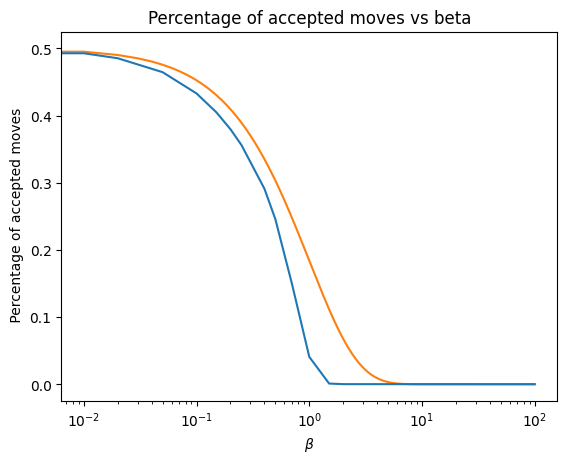

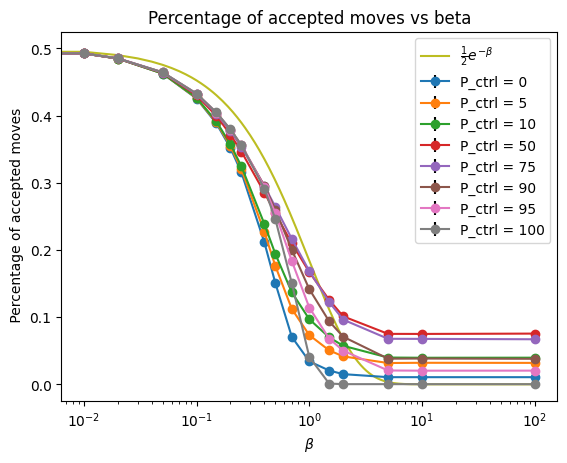

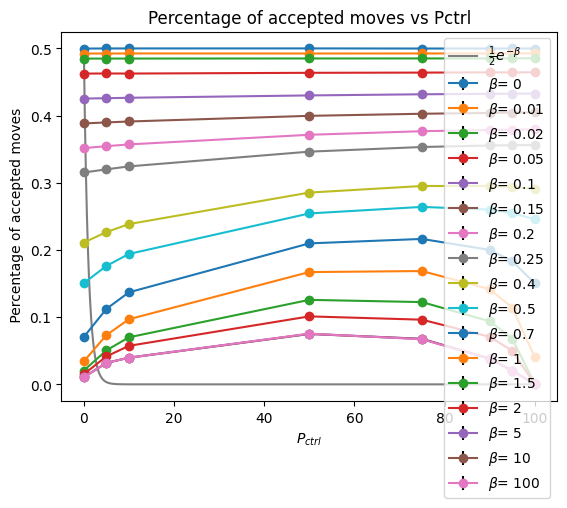

In [141]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r' Percentage of accepted moves')
ax.set_title(r'Percentage of accepted moves vs beta')
ax.errorbar(betarange, np.average(acceptance, axis=0)[-1,:]/((length**2)*num_chains*length//2), np.std(acceptance/((length**2)*num_chains*length//2), axis=0, ddof=1)[-1,:]/np.sqrt(times), label='experiment')
ax.plot(np.linspace(betarange[0], betarange[-1], 10000),(1/2)*np.exp(-np.linspace(betarange[0], betarange[-1], 10000)))# not sure exactly how to compare it

# ax.plot(np.linspace(betarange(0), betarange(-1), 10000), ) not sure exactly how to compare it
plt.xscale('log')
fig, ax = plt.subplots()
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r' Percentage of accepted moves')
ax.set_title(r'Percentage of accepted moves vs beta')
for i in range(num_points):
    ax.errorbar(betarange, np.average(acceptance, axis=0)[i,:]/((length**2)*num_chains*length//2), np.std(acceptance/((length**2)*num_chains*length//2), axis=0, ddof=1)[i,:]/np.sqrt(times), marker = 'o',label='P_ctrl = ' + str(prob_range[i]), ecolor='0')
ax.plot(np.linspace(betarange[0], betarange[-1], 10000),(1/2)*np.exp(-np.linspace(betarange[0], betarange[-1], 10000)), label = r'$\frac{1}{2}e^{-\beta}$')# not sure exactly how to compare it

plt.legend()
plt.xscale('log')

fig, ax = plt.subplots()
ax.set_xlabel(r'$P_{ctrl}$')
ax.set_ylabel(r' Percentage of accepted moves')
ax.set_title(r'Percentage of accepted moves vs Pctrl')
for i in range(betalength):
    ax.errorbar(prob_range, np.average(acceptance, axis=0)[:,i]/((length**2)*num_chains*length//2), np.std(acceptance/((length**2)*num_chains*length//2), axis=0, ddof=1)[:,i]/np.sqrt(times), marker = 'o',label=r'$\beta$= ' + str(betarange[i]), ecolor='0')
ax.plot(np.linspace(betarange[0], betarange[-1], 10000),(1/2)*np.exp(-np.linspace(betarange[0], betarange[-1], 10000)), label = r'$\frac{1}{2}e^{-\beta}$')# not sure exactly how to compare it

plt.legend()


In [ ]:
print( np.average(acceptance, axis=0)[-1,:]/((length**2)*num_chains*length//2))
np.average(staggeredMagnetization, axis = 0)[:,-1,:]
print(np.std(acceptance/((length**2)*num_chains*length//2), axis=0, ddof=1)[-1,:])

[4.99462e-01 4.92019e-01 4.84834e-01 4.64217e-01 4.32846e-01 4.05144e-01
 3.79849e-01 3.56676e-01 2.91239e-01 2.47180e-01 1.48643e-01 4.67840e-02
 1.10800e-03 2.86000e-04 1.71000e-04 2.02000e-04 2.42000e-04]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
